# Run and compare models


In [72]:
import argparse
import sys

# Tensorflow ans tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import math
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [73]:
# load MNIST data => changed at keras version
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

(X_train_org, y_train_org), (X_test_org, y_test_org) = tf.keras.datasets.mnist.load_data()
print(y_train_org[0])
X_train = X_train_org.astype(np.float32).reshape(-1, 28*28) / 255.0 # image ### Image
X_test = X_test_org.astype(np.float32).reshape(-1, 28*28) / 255.0 # image
y_train = tf.keras.utils.to_categorical(y_train_org) ### label (class vector(integer) => binary class matrix): 범주형 인코딩
y_test = tf.keras.utils.to_categorical(y_test_org) 
print(y_train[0])
y_train = y_train.astype(np.int32) # label => 
y_test = y_test.astype(np.int32)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0 0 0 0 0 1 0 0 0 0]


## Image, label 데이터 참고용
Link: https://www.tensorflow.org/tutorials/keras/classification

<class 'numpy.ndarray'>
(60000, 784)
<class 'numpy.ndarray'>
(60000, 10)
<class 'numpy.ndarray'>
[0 0 0 0 0 1 0 0 0 0]
(array([5], dtype=int64),)
<class 'tuple'>
5


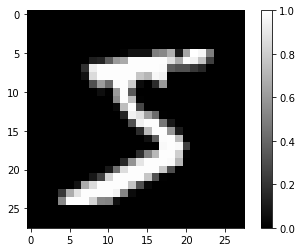

In [74]:
# Check data and label.
print(type(X_train))
print(X_train.shape)
[n_image,n_pix] = X_train.shape
print(type(y_train))
print(y_train.shape)

temp = np.zeros((28,28),dtype='float32')

for i in range(n_pix):
    [row_n,col_n] = divmod(i,28) # quotient -> row, remainder -> col
    temp[row_n, col_n] = X_train[0,i]

plt.imshow(temp, cmap='gray')
plt.colorbar()


print("=======================")
print(type(y_train[0]))
print(y_train[0])
print(np.where(y_train[0] == 1))
print(type(np.where(y_train[0] == 1)))
print(np.where(y_train[0] == 1)[0][0]) # index of the number => it means, it seems like number 7

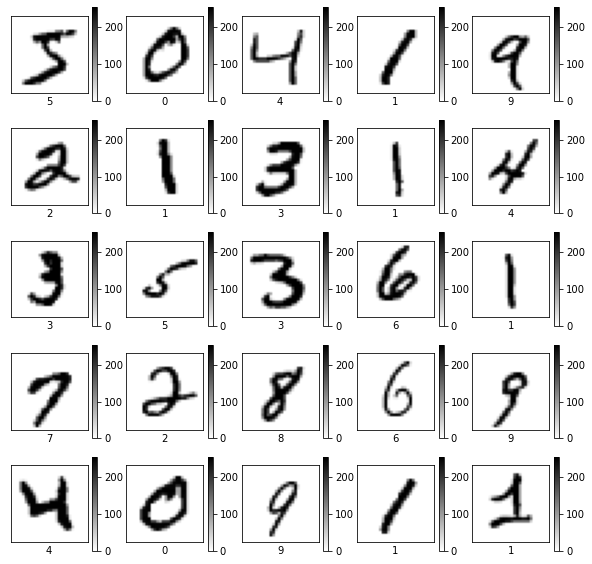

In [75]:
    train_images = X_train_org / 255.0

    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_train_org[i], cmap=plt.cm.binary)
        plt.xlabel(y_train_org[i])
        plt.colorbar()    
    plt.show()


## Build model

In [76]:
# https://cyc1am3n.github.io/2018/11/02/introduction-to-keras.html
from keras import models
from keras.models import load_model
from keras import layers

# sequential model
model = models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(784,)))
model.add(layers.Dense(10,activation='softmax'))

# # funtion API
# input_tensor = layers.Input(shape=(784,))
# x = layers.Dense(32, activation='relu')(input_tensor)
# output_tensor = layers.Dense(10, activation='softmax')(x)

# model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [77]:
# 모델 컴파일 하기
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [78]:
# fit() 메서드로 모델 훈련 시키기
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.4658 - accuracy: 0.8762
Epoch 2/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.2442 - accuracy: 0.9315
Epoch 3/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.1988 - accuracy: 0.9430
Epoch 4/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.1707 - accuracy: 0.9512
Epoch 5/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.1523 - accuracy: 0.9560


In [79]:
# 테스트 데이터로 정확도 측정하기
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_acc: ', test_acc)

10000/10000 [==============================] - 2s 210us/step
test_acc:  0.9546999931335449


# Save Model, visualize, load
link: https://tykimos.github.io/2017/06/10/Model_Save_Load/

In [80]:
model.save('save/mnist_mlp_model.h5')


# # JSON https://3months.tistory.com/150 - not yet
# from keras.models import model_from_json
# json_string = model.to_json() # 모델 아키텍처를 json 형식으로 저장
# model_json = model_from_json(json_string) # json 파일에서 모델 아키텍처 재구성
# # model_json.save_model('save/mnist_mlp_model_json.json')
# with open("save/model.json", "w") as json_file : 
#     json_file.write(model_json)
# model.save_weights('save/mnist_mlp_weight_json.h5')

# from keras.models import model_from_yaml
# yaml_string = model.to_yaml() # 모델 아키텍처를 yaml 형식으로 저장
# model_yaml = model_from_yaml(yaml_string) # yaml 파일에서 모델 아키텍처 재구성
# model_yaml.save_model('save/mnist_mlp_model_yaml.yaml')
# model.save_weights('save/mnist_mlp_weight_yaml.h5')

# Visualize model example

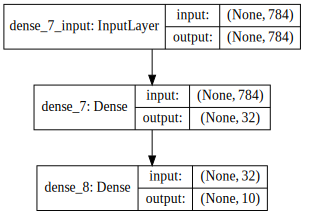

In [84]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi = 70).create(prog='dot', format='svg'))

In [82]:
# load 


In [83]:
# %pip list


Package                       Version
----------------------------- -------------------
absl-py                       0.9.0
alabaster                     0.7.12
argh                          0.26.2
astor                         0.8.0
astroid                       2.3.3
atomicwrites                  1.4.0
attrs                         19.3.0
autopep8                      1.5.3
Babel                         2.8.0
backcall                      0.2.0
bcrypt                        3.1.7
bleach                        3.1.5
brotlipy                      0.7.0
catboost                      0.23.2
certifi                       2020.6.20
cffi                          1.14.0
chardet                       3.0.4
cloudpickle                   1.5.0
colorama                      0.4.3
cryptography                  2.9.2
cycler                        0.10.0
cytoolz                       0.10.1
dask                          2.21.0
DateTime                      4.3
decorator                     4.4.2
de